# Importing Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing Dataset

In [13]:
df = pd.read_csv('AirPassengers.csv')

# Data Pre-Processing

In [6]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [14]:
df.columns = ['Month', 'Values']

# Month has Dtype of object, we need to change it to as DateTime

In [16]:
df['Month'] = pd.to_datetime(df['Month'])

In [17]:
df.head()

,Month,Values
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   144 non-null    datetime64[ns]
 1   Values  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


# Setting Index to Month Column

In [22]:
df.set_index('Month', inplace=True)

In [23]:
df

,Values
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


# Data Analysis

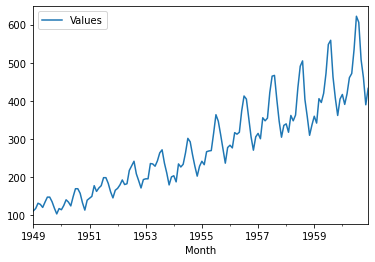

In [26]:
df.plot()

In [27]:
from statsmodels.tsa.stattools import adfuller

In [28]:
res = adfuller(df['Values'])

In [29]:
res[1]

0.9920653980124213

### Since, p value > 0.05, i.e the given dataset is not stationary

In [32]:
res

(0.8273719403667981,
 0.9920653980124213,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6342367604004)

In [33]:
df['Values2'] = df['Values'] - df['Values'].shift(1)

In [34]:
df.head()

,Values,Values2
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


In [35]:
df.dropna()

,Values,Values2
Month,,
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0
1949-06-01,135,14.0
...,...,...
1960-08-01,606,-16.0
1960-09-01,508,-98.0
1960-10-01,461,-47.0


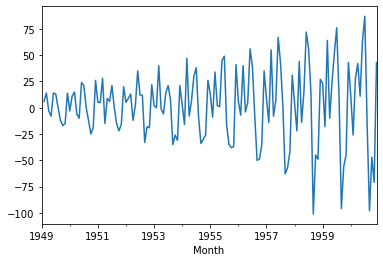

In [37]:
df['Values2'].plot()

# plotting correlation plots - acf, pacf

In [40]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

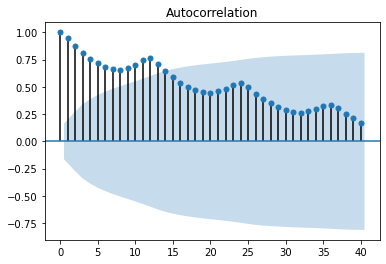

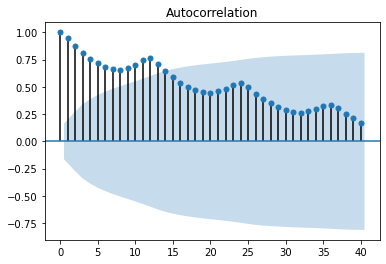

In [42]:
plot_acf(df['Values'], lags=40)

C:\Users\mehul\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


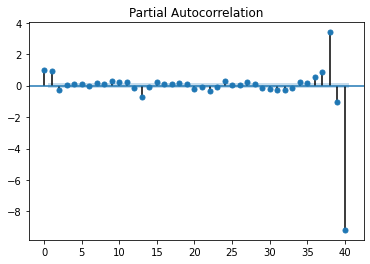

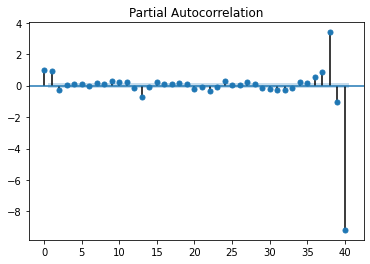

In [43]:
plot_pacf(df['Values'], lags=40)

# ARIMA Model

In [53]:
from statsmodels.tsa.arima.model import ARIMA as arima

In [45]:
df['Values'].shape

(144,)

# Train-Test Split

In [50]:
y_train = df[:100]
y_train.shape

(100, 2)

In [51]:
y_test = df[100:]
y_test.shape

(44, 2)

# Model Training

In [98]:
model = arima(y_train['Values'], order=(16, 3, 2))
results = model.fit()

C:\Users\mehul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mehul\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\mehul\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\mehul\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [99]:
y_pred = results.predict()
y_pred.shape

(100,)

# Model Visualization

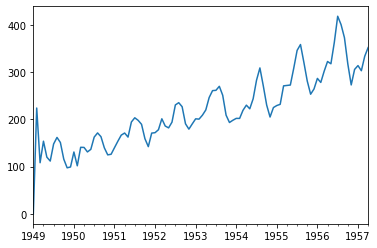

In [100]:
y_pred.plot()

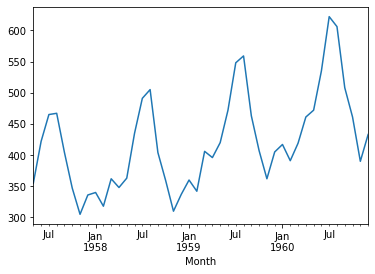

In [101]:
y_test['Values'].plot()

# Model Evaluation

In [102]:
y_for = results.forecast(steps=44)
y_for.shape

(44,)

In [104]:
from sklearn.metrics import mean_squared_error

In [105]:
np.sqrt(mean_squared_error(y_test['Values'], y_for))

35.87315703351399

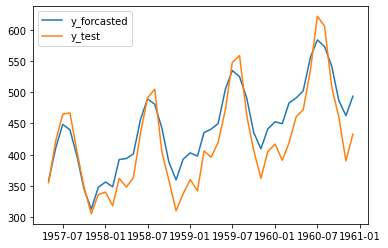

In [106]:
plt.plot(y_for)
plt.plot(y_test['Values'])
plt.legend(['y_forcasted', 'y_test'])
plt.show()